In [ ]:
pip install transformers


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/output_articles.csv")

In [ ]:
df


Upload Date  Article Date                                   Headline  \
0   31st December   2nd January   Footage shows lone 'gunman' in nightclub   
1     4th January   6th January            BBC Radio 4 - The World Tonight   
2     5th January   7th January            BBC Radio 4 - The World Tonight   
3     6th January   8th January    Egg and sperm tech wants to make babies   
4     8th January  10th January            BBC Radio 4 - The World Tonight   
5     9th January  11th January            BBC Radio 4 - The World Tonight   
6    10th January  12th January            BBC Radio 4 - The World Tonight   
7    11th January  13th January  'Snow chaos' and UK role in Trump scandal   
8    12th January  14th January        Seven-day GPs and stolen baby found   
9    15th January  17th January            BBC Radio 4 - The World Tonight   
10   16th January  18th January            BBC Radio 4 - The World Tonight   
11   17th January  19th January            BBC Radio 4 - The World Tonight   
12   18th January  20th January            BBC Radio 4 - The World Tonight   
13   19th January  21st January   President Trump's 'message to the world'   
14   20th January  22nd January      A message of hope at Washington march   
15   23rd January  25th January           MPs' 'new plot to thwart Brexit'   
16   24th January  26th January            BBC Radio 4 - The World Tonight   
17   25th January  27th January            BBC Radio 4 - The World Tonight   
18   26th January  28th January            BBC Radio 4 - The World Tonight   
19   27th January  29th January        Theresa May hand in hand with Trump   

                                              Content  
0   Olivier Giroud's incredible scorpion kick sets...  
1   Pep Guardiola is looking forward to a "special...  
2   Player and manager reaction as Manchester City...  
3   FA Cup third round highlights from around the ...  
4   Follow BBC Radio 5 live, local radio, in-play ...  
5   War reporter who got one of the 20th Century's...  
6   Follow BBC Radio 5 live and text reaction from...  
7   Snowy scenes feature on most of the front page...  
8   Theresa May's demand for GP surgeries to open ...  
9   How has the Afghan cover star coped after leav...  
10  Lincoln City reach the fourth round of the FA ...  
11  Manchester United agree a deal to sell Memphis...  
12  Watch live BBC coverage of Marco Fu against Ma...  
13  US President Donald Trump's inaugural address ...  
14  The UK-US relationship is in focus as Theresa ...  
15  The Supreme Court's ruling that Parliament mus...  
16  Usain Bolt has to hand back one of his nine Ol...  
17  Mourinho's men off to Wembley. Updates, images...  
18  Player and manager reaction from the fourth ro...  
19  The best of the action from Saturday's FA Cup ...

In [ ]:
import pandas as pd
from transformers import pipeline, AutoTokenizer

# Load the CSV data
df = pd.read_csv('/content/output_articles.csv')

# Preprocess the text data
df['text'] = df['Headline'] + ' ' + df['Content']
df['text'] = df['text'].str.replace('<[^<]+?>', '', regex=True)  # Remove HTML tags

# Load the sentiment analysis model and tokenizer
model_name = 'distilbert-base-uncased-finetuned-sst-2-english'
sentiment_analyzer = pipeline('sentiment-analysis', model=model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Function to truncate text to the maximum sequence length
def truncate_text(text):
    tokens = tokenizer.tokenize(text)
    truncated_tokens = tokens[:tokenizer.model_max_length - 2] # -2 to account for [CLS] and [SEP] tokens
    truncated_text = tokenizer.convert_tokens_to_string(truncated_tokens)
    return truncated_text

# Apply the truncation function to the 'text' column
df['text'] = df['text'].apply(truncate_text)

# Predict the sentiment for each article
df['sentiment'] = df['text'].apply(sentiment_analyzer)

# Save the updated DataFrame to a new CSV file
df.to_csv('bbc_articles_with_sentiment.csv', index=False)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Token indices sequence length is longer than the specified maximum sequence length for this model (32574 > 512). Running this sequence through the model will result in indexing errors


In [ ]:
def analyze_sentiment_with_score(text):
    result = sentiment_analyzer(text)[0]
    return {
        'label': result['label'],
        'score': result['score']
    }

df['sentiment'] = df['text'].apply(analyze_sentiment_with_score)
df['sentiment_label'] = df['sentiment'].apply(lambda x: x['label'])
df['sentiment_score'] = df['sentiment'].apply(lambda x: x['score'])

In [ ]:
df

Upload Date  Article Date                                   Headline  \
0   31st December   2nd January   Footage shows lone 'gunman' in nightclub   
1     4th January   6th January            BBC Radio 4 - The World Tonight   
2     5th January   7th January            BBC Radio 4 - The World Tonight   
3     6th January   8th January    Egg and sperm tech wants to make babies   
4     8th January  10th January            BBC Radio 4 - The World Tonight   
5     9th January  11th January            BBC Radio 4 - The World Tonight   
6    10th January  12th January            BBC Radio 4 - The World Tonight   
7    11th January  13th January  'Snow chaos' and UK role in Trump scandal   
8    12th January  14th January        Seven-day GPs and stolen baby found   
9    15th January  17th January            BBC Radio 4 - The World Tonight   
10   16th January  18th January            BBC Radio 4 - The World Tonight   
11   17th January  19th January            BBC Radio 4 - The World Tonight   
12   18th January  20th January            BBC Radio 4 - The World Tonight   
13   19th January  21st January   President Trump's 'message to the world'   
14   20th January  22nd January      A message of hope at Washington march   
15   23rd January  25th January           MPs' 'new plot to thwart Brexit'   
16   24th January  26th January            BBC Radio 4 - The World Tonight   
17   25th January  27th January            BBC Radio 4 - The World Tonight   
18   26th January  28th January            BBC Radio 4 - The World Tonight   
19   27th January  29th January        Theresa May hand in hand with Trump   

                                              Content  \
0   Olivier Giroud's incredible scorpion kick sets...   
1   Pep Guardiola is looking forward to a "special...   
2   Player and manager reaction as Manchester City...   
3   FA Cup third round highlights from around the ...   
4   Follow BBC Radio 5 live, local radio, in-play ...   
5   War reporter who got one of the 20th Century's...   
6   Follow BBC Radio 5 live and text reaction from...   
7   Snowy scenes feature on most of the front page...   
8   Theresa May's demand for GP surgeries to open ...   
9   How has the Afghan cover star coped after leav...   
10  Lincoln City reach the fourth round of the FA ...   
11  Manchester United agree a deal to sell Memphis...   
12  Watch live BBC coverage of Marco Fu against Ma...   
13  US President Donald Trump's inaugural address ...   
14  The UK-US relationship is in focus as Theresa ...   
15  The Supreme Court's ruling that Parliament mus...   
16  Usain Bolt has to hand back one of his nine Ol...   
17  Mourinho's men off to Wembley. Updates, images...   
18  Player and manager reaction from the fourth ro...   
19  The best of the action from Saturday's FA Cup ...   

                                                 text  \
0   footage shows lone ' gunman ' in nightclub oli...   
1   bbc radio 4 - the world tonight pep guardiola ...   
2   bbc radio 4 - the world tonight player and man...   
3   egg and sperm tech wants to make babies fa cup...   
4   bbc radio 4 - the world tonight follow bbc rad...   
5   bbc radio 4 - the world tonight war reporter w...   
6   bbc radio 4 - the world tonight follow bbc rad...   
7   ' snow chaos ' and uk role in trump scandal sn...   
8   seven - day gps and stolen baby found theresa ...   
9   bbc radio 4 - the world tonight how has the af...   
10  bbc radio 4 - the world tonight lincoln city r...   
11  bbc radio 4 - the world tonight manchester uni...   
12  bbc radio 4 - the world tonight watch live bbc...   
13  president trump ' s ' message to the world ' u...   
14  a message of hope at washington march the uk -...   
15  mps ' ' new plot to thwart brexit ' the suprem...   
16  bbc radio 4 - the world tonight usain bolt has...   
17  bbc radio 4 - the world tonight mourinho ' s m...   
18  bbc radio 4 - the world tonight player and man...   
19  theresa may hand in hand 

In [ ]:
df1=pd.read_csv("/content/bbc_articles_with_sentiment.csv")
df1

Upload Date  Article Date                                   Headline  \
0   31st December   2nd January   Footage shows lone 'gunman' in nightclub   
1     4th January   6th January            BBC Radio 4 - The World Tonight   
2     5th January   7th January            BBC Radio 4 - The World Tonight   
3     6th January   8th January    Egg and sperm tech wants to make babies   
4     8th January  10th January            BBC Radio 4 - The World Tonight   
5     9th January  11th January            BBC Radio 4 - The World Tonight   
6    10th January  12th January            BBC Radio 4 - The World Tonight   
7    11th January  13th January  'Snow chaos' and UK role in Trump scandal   
8    12th January  14th January        Seven-day GPs and stolen baby found   
9    15th January  17th January            BBC Radio 4 - The World Tonight   
10   16th January  18th January            BBC Radio 4 - The World Tonight   
11   17th January  19th January            BBC Radio 4 - The World Tonight   
12   18th January  20th January            BBC Radio 4 - The World Tonight   
13   19th January  21st January   President Trump's 'message to the world'   
14   20th January  22nd January      A message of hope at Washington march   
15   23rd January  25th January           MPs' 'new plot to thwart Brexit'   
16   24th January  26th January            BBC Radio 4 - The World Tonight   
17   25th January  27th January            BBC Radio 4 - The World Tonight   
18   26th January  28th January            BBC Radio 4 - The World Tonight   
19   27th January  29th January        Theresa May hand in hand with Trump   

                                              Content  \
0   Olivier Giroud's incredible scorpion kick sets...   
1   Pep Guardiola is looking forward to a "special...   
2   Player and manager reaction as Manchester City...   
3   FA Cup third round highlights from around the ...   
4   Follow BBC Radio 5 live, local radio, in-play ...   
5   War reporter who got one of the 20th Century's...   
6   Follow BBC Radio 5 live and text reaction from...   
7   Snowy scenes feature on most of the front page...   
8   Theresa May's demand for GP surgeries to open ...   
9   How has the Afghan cover star coped after leav...   
10  Lincoln City reach the fourth round of the FA ...   
11  Manchester United agree a deal to sell Memphis...   
12  Watch live BBC coverage of Marco Fu against Ma...   
13  US President Donald Trump's inaugural address ...   
14  The UK-US relationship is in focus as Theresa ...   
15  The Supreme Court's ruling that Parliament mus...   
16  Usain Bolt has to hand back one of his nine Ol...   
17  Mourinho's men off to Wembley. Updates, images...   
18  Player and manager reaction from the fourth ro...   
19  The best of the action from Saturday's FA Cup ...   

                                                 text  \
0   footage shows lone ' gunman ' in nightclub oli...   
1   bbc radio 4 - the world tonight pep guardiola ...   
2   bbc radio 4 - the world tonight player and man...   
3   egg and sperm tech wants to make babies fa cup...   
4   bbc radio 4 - the world tonight follow bbc rad...   
5   bbc radio 4 - the world tonight war reporter w...   
6   bbc radio 4 - the world tonight follow bbc rad...   
7   ' snow chaos ' and uk role in trump scandal sn...   
8   seven - day gps and stolen baby found theresa ...   
9   bbc radio 4 - the world tonight how has the af...   
10  bbc radio 4 - the world tonight lincoln city r...   
11  bbc radio 4 - the world tonight manchester uni...   
12  bbc radio 4 - the world tonight watch live bbc...   
13  president trump ' s ' message to the world ' u...   
14  a message of hope at washington march the uk -...   
15  mps ' ' new plot to thwart brexit ' the suprem...   
16  bbc radio 4 - the world tonight usain bolt has...   
17  bbc radio 4 - the world tonight mourinho ' s m...   
18  bbc radio 4 - the world tonight player and man...   
19  theresa may hand in hand 

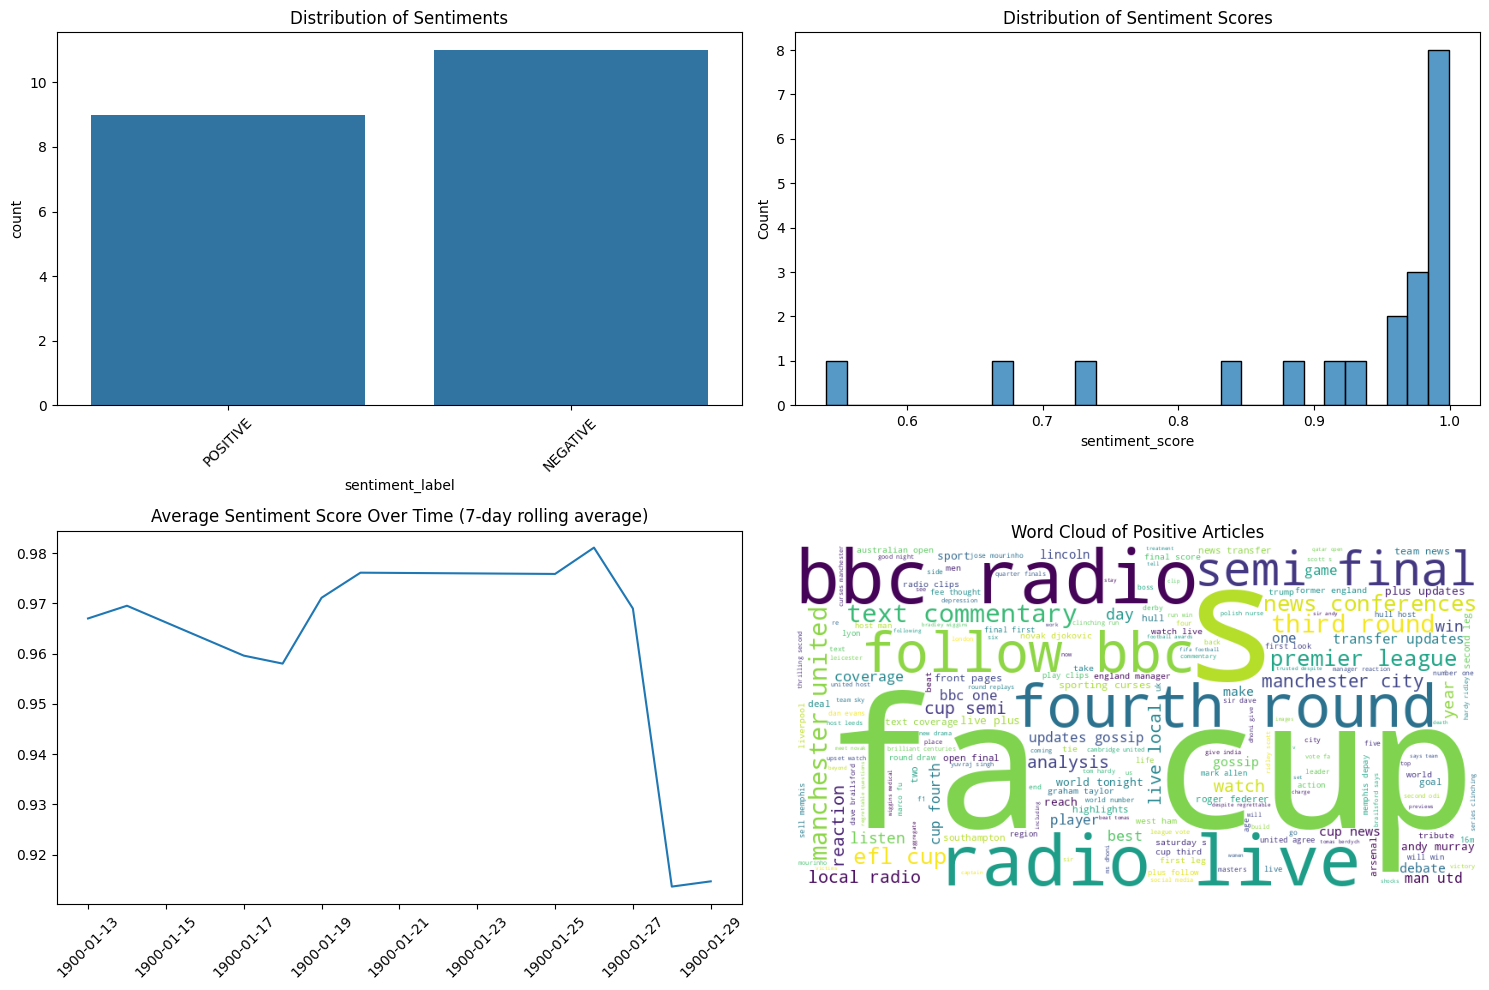

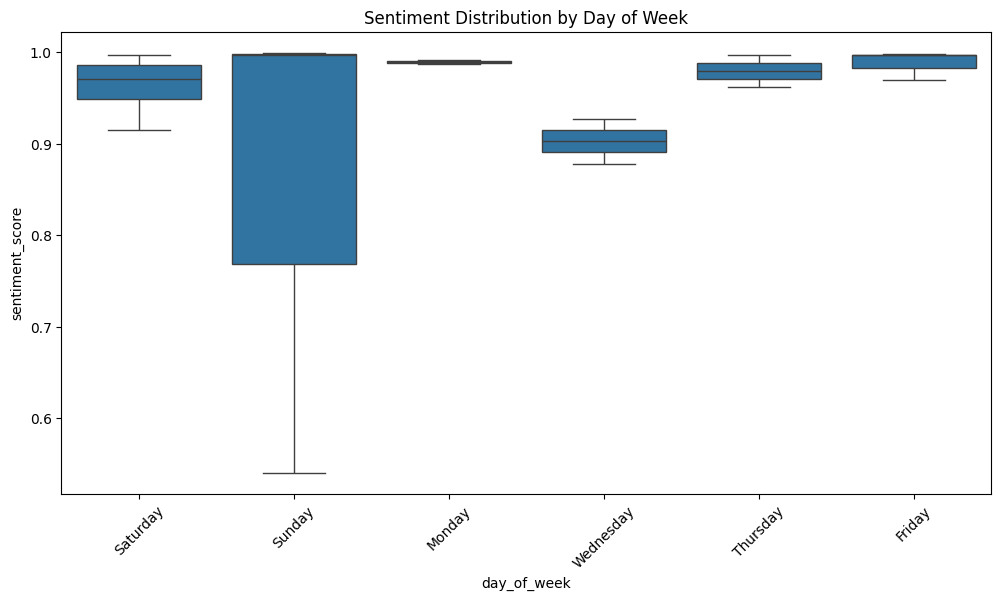

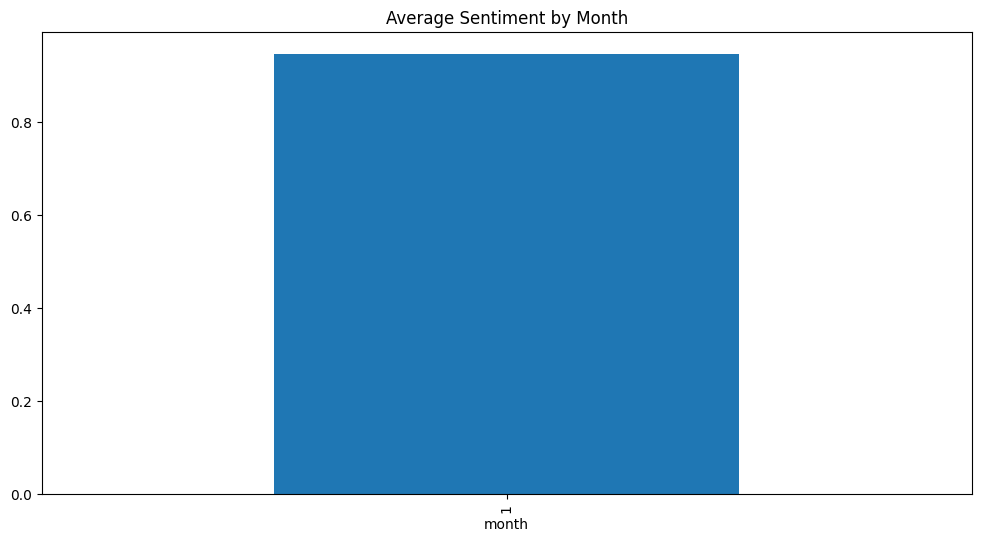

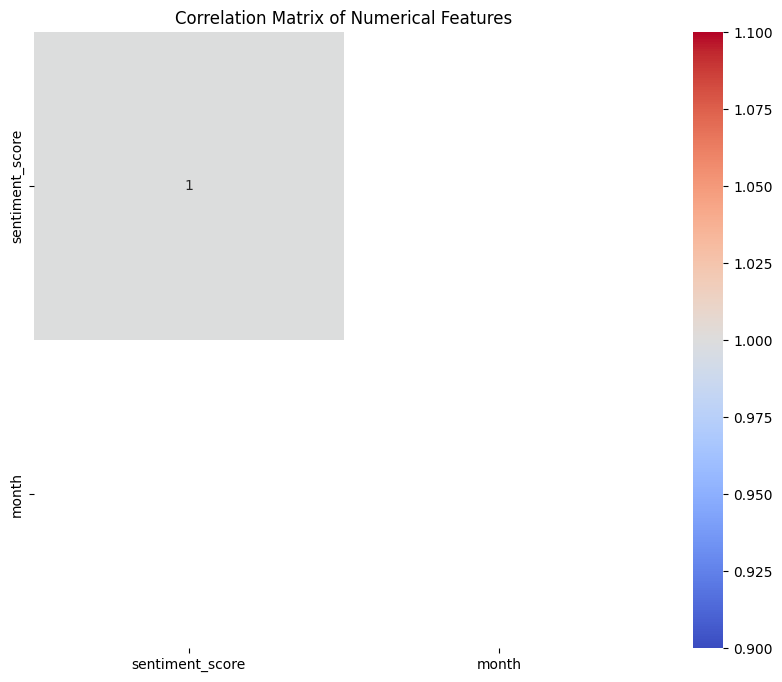

TypeError: no numeric data to plot

<Figure size 1000x600 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
import numpy as np

# Assuming df is your DataFrame with sentiment analysis results
# First, let's extract sentiment scores and create separate columns

def create_visualization_dashboard(df):
    # 1. Sentiment Distribution Plot
    plt.figure(figsize=(15, 10))

    # Create subplots
    plt.subplot(2, 2, 1)
    sns.countplot(data=df, x='sentiment_label')
    plt.title('Distribution of Sentiments')
    plt.xticks(rotation=45)

    # 2. Sentiment Scores Distribution
    plt.subplot(2, 2, 2)
    sns.histplot(data=df, x='sentiment_score', bins=30)
    plt.title('Distribution of Sentiment Scores')

    # 3. Sentiment Over Time
    plt.subplot(2, 2, 3)
    df['Article_Date'] = pd.to_datetime(df['Article Date'])
    sentiment_over_time = df.groupby('Article_Date')['sentiment_score'].mean().rolling(7).mean()
    plt.plot(sentiment_over_time.index, sentiment_over_time.values)
    plt.title('Average Sentiment Score Over Time (7-day rolling average)')
    plt.xticks(rotation=45)

    # 4. Top Keywords by Sentiment
    plt.subplot(2, 2, 4)
    df['positive'] = df['sentiment_score'] > 0.5
    positive_text = ' '.join(df[df['positive']]['text'])
    negative_text = ' '.join(df[~df['positive']]['text'])

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title('Word Cloud of Positive Articles')

    plt.tight_layout()
    plt.show()

# Interactive Visualizations with Plotly
def create_visualization_dashboard(df):
    # 1. Sentiment Distribution Plot
    plt.figure(figsize=(15, 10))

    # Create subplots
    plt.subplot(2, 2, 1)
    sns.countplot(data=df, x='sentiment_label')
    plt.title('Distribution of Sentiments')
    plt.xticks(rotation=45)

    # 2. Sentiment Scores Distribution
    plt.subplot(2, 2, 2)
    sns.histplot(data=df, x='sentiment_score', bins=30)
    plt.title('Distribution of Sentiment Scores')

    # 3. Sentiment Over Time
    plt.subplot(2, 2, 3)
    # Applying custom date parsing to handle '2nd January' format
    df['Article_Date'] = pd.to_datetime(df['Article Date'], format='%dth %B', errors='coerce')
    # Handling potential NaT values after conversion
    df.dropna(subset=['Article_Date'], inplace=True)

    sentiment_over_time = df.groupby('Article_Date')['sentiment_score'].mean().rolling(7).mean()
    plt.plot(sentiment_over_time.index, sentiment_over_time.values)
    plt.title('Average Sentiment Score Over Time (7-day rolling average)')
    plt.xticks(rotation=45)

    # 4. Top Keywords by Sentiment
    plt.subplot(2, 2, 4)
    df['positive'] = df['sentiment_score'] > 0.5
    positive_text = ' '.join(df[df['positive']]['text'])
    negative_text = ' '.join(df[~df['positive']]['text'])

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title('Word Cloud of Positive Articles')

    plt.tight_layout()
    plt.show()

# Additional Analysis Functions
def analyze_sentiment_patterns(df):
    # 1. Day of Week Analysis
    df['day_of_week'] = df['Article_Date'].dt.day_name()
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='day_of_week', y='sentiment_score')
    plt.title('Sentiment Distribution by Day of Week')
    plt.xticks(rotation=45)
    plt.show()

    # 2. Monthly Trends
    df['month'] = df['Article_Date'].dt.month
    monthly_sentiment = df.groupby('month')['sentiment_score'].mean()
    plt.figure(figsize=(12, 6))
    monthly_sentiment.plot(kind='bar')
    plt.title('Average Sentiment by Month')
    plt.show()

# Correlation Analysis
def analyze_correlations(df):
    # Create correlation matrix for numerical columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    correlation_matrix = df[numeric_cols].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()

# Topic-based Sentiment Analysis
def analyze_topics(df):
    # Simple topic detection based on keywords
    topics = {
        'sports': ['football', 'soccer', 'sport', 'match', 'game'],
        'politics': ['government', 'policy', 'election', 'minister'],
        'business': ['market', 'economy', 'business', 'company'],
        'technology': ['tech', 'technology', 'digital', 'innovation']
    }

    for topic, keywords in topics.items():
        df[topic] = df['text'].str.contains('|'.join(keywords), case=False)

    # Plot average sentiment by topic
    topic_sentiment = pd.DataFrame()
    for topic in topics.keys():
        topic_sentiment[topic] = df[df[topic]]['sentiment_score'].mean()

    plt.figure(figsize=(10, 6))
    topic_sentiment.T.plot(kind='bar')
    plt.title('Average Sentiment Score by Topic')
    plt.show()

# Usage
# First, ensure your DataFrame has the required columns
df['sentiment_score'] = df['sentiment'].apply(lambda x: x['score'])
df['sentiment_label'] = df['sentiment'].apply(lambda x: x['label'])

# Create all visualizations
create_visualization_dashboard(df)
create_interactive_visualizations(df)
analyze_sentiment_patterns(df)
analyze_correlations(df)
analyze_topics(df)

# Save the figures
plt.savefig('sentiment_analysis_results.pdf')